<h1>Load and Explore the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
behaviors = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mind-news-dataset/MINDsmall_train/behaviors.tsv', sep='\t', header=None, names=['ImpressionID', 'UserID', 'Time', 'History', 'Impressions'])
news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mind-news-dataset/MINDsmall_train/news.tsv', sep='\t', header=None, names=['NewsID', 'Category', 'Subcategory', 'Title', 'Abstract', 'URL', 'TitleEntities', 'AbstractEntities'])

print(behaviors.head())
print(news.head())


   ImpressionID  UserID                   Time  \
0             1  U13740  11/11/2019 9:05:58 AM   
1             2  U91836  11/12/2019 6:11:30 PM   
2             3  U73700  11/14/2019 7:01:48 AM   
3             4  U34670  11/11/2019 5:28:05 AM   
4             5   U8125  11/12/2019 4:11:21 PM   

                                             History  \
0  N55189 N42782 N34694 N45794 N18445 N63302 N104...   
1  N31739 N6072 N63045 N23979 N35656 N43353 N8129...   
2  N10732 N25792 N7563 N21087 N41087 N5445 N60384...   
3  N45729 N2203 N871 N53880 N41375 N43142 N33013 ...   
4                        N10078 N56514 N14904 N33740   

                                         Impressions  
0                                  N55689-1 N35729-0  
1  N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...  
2  N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...  
3                N35729-0 N33632-0 N49685-1 N27581-0  
4  N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...  
   NewsID   Category      Subcat

Visualize the Data<br>
4.1. Distribution of News Categories

C:\Users\User\AppData\Local\Temp\ipykernel_15328\3572735226.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


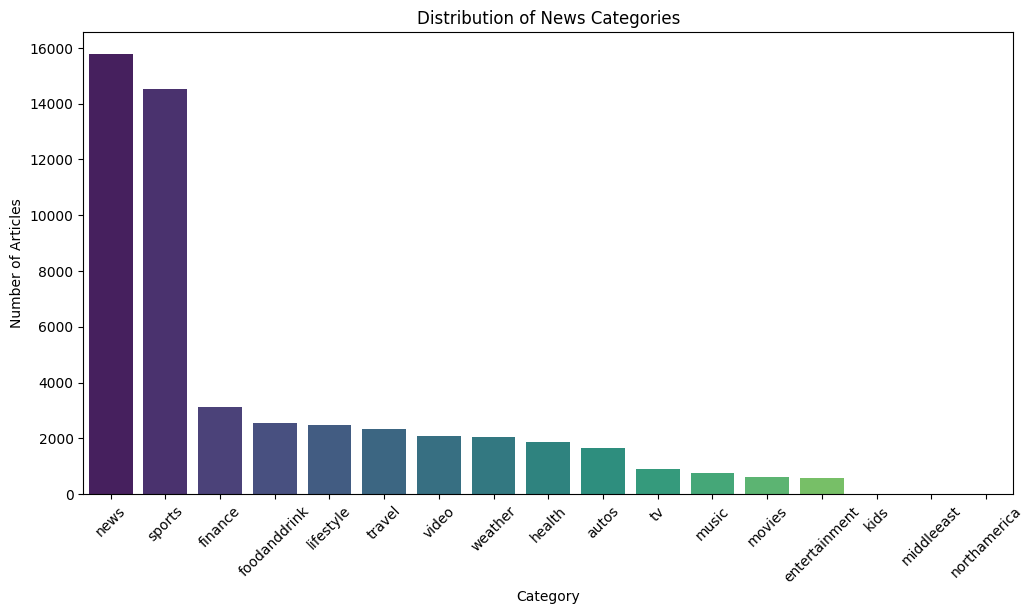

In [ ]:
# Count the number of articles per category
category_counts = news['Category'].value_counts()

# Plot the distribution of news categories
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


4.2. Number of Interactions per User

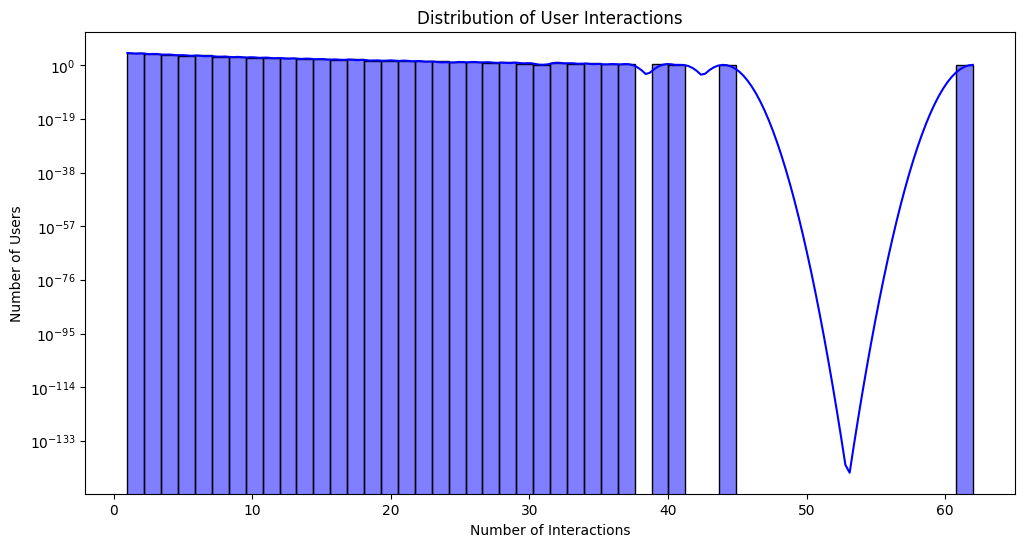

In [ ]:
# Count the number of interactions per user
user_interactions = behaviors['UserID'].value_counts()

# Plot the distribution of user interactions
plt.figure(figsize=(12, 6))
sns.histplot(user_interactions, bins=50, kde=True, color='blue')
plt.title('Distribution of User Interactions')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()


4.3. Average Length of News Titles and Abstracts

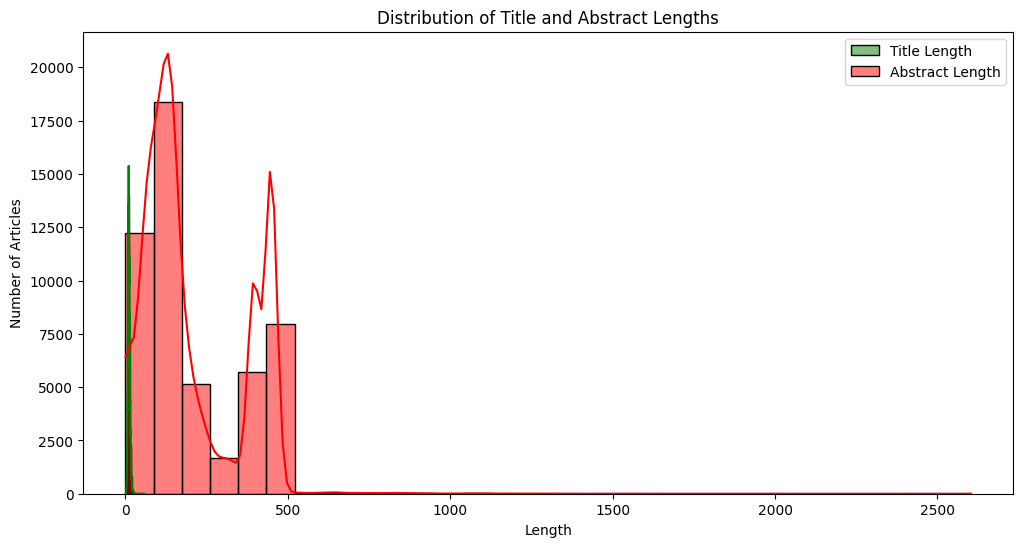

In [ ]:
# Handle missing values and convert to strings
news['Title'] = news['Title'].fillna('').astype(str)
news['Abstract'] = news['Abstract'].fillna('').astype(str)

# Calculate the length of news titles and abstracts
news['TitleLength'] = news['Title'].apply(lambda x: len(x.split()))
news['AbstractLength'] = news['Abstract'].apply(lambda x: len(x))

# Plot the distribution of title and abstract lengths
plt.figure(figsize=(12, 6))
sns.histplot(news['TitleLength'], bins=30, kde=True, color='green', label='Title Length')
sns.histplot(news['AbstractLength'], bins=30, kde=True, color='red', label='Abstract Length')
plt.title('Distribution of Title and Abstract Lengths')
plt.xlabel('Length')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

4.4. Interaction History Length per User

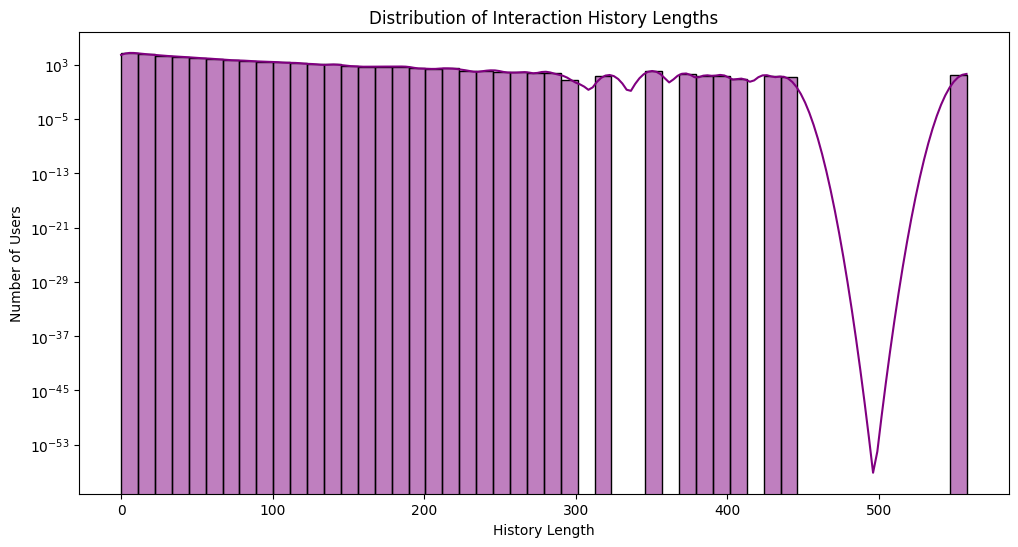

In [ ]:
# Calculate the length of interaction history per user
behaviors['HistoryLength'] = behaviors['History'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Plot the distribution of history lengths
plt.figure(figsize=(12, 6))
sns.histplot(behaviors['HistoryLength'], bins=50, kde=True, color='purple')
plt.title('Distribution of Interaction History Lengths')
plt.xlabel('History Length')
plt.ylabel('Number of Users')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()


Tokenization Using SpaCy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

news['TokenizedTitle'] = news['Title'].apply(tokenize)
news['TokenizedAbstract'] = news['Abstract'].apply(tokenize)

print(news[['Title', 'TokenizedTitle']].head())
print(news[['Abstract', 'TokenizedAbstract']].head())


                                               Title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1                      50 Worst Habits For Belly Fat   
2  The Cost of Trump's Aid Freeze in the Trenches...   
3  I Was An NBA Wife. Here's How It Affected My M...   
4  How to Get Rid of Skin Tags, According to a De...   

                                      TokenizedTitle  
0  [The, Brands, Queen, Elizabeth, ,, Prince, Cha...  
1               [50, Worst, Habits, For, Belly, Fat]  
2  [The, Cost, of, Trump, 's, Aid, Freeze, in, th...  
3  [I, Was, An, NBA, Wife, ., Here, 's, How, It, ...  
4  [How, to, Get, Rid, of, Skin, Tags, ,, Accordi...  
                                            Abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  These seemingly harmless habits are holding yo...   
2  Lt. Ivan Molchanets peeked over a parapet of s...   
3  I felt like I was a fraud, and being an NBA wi...   
4  They seem harmless, but there's a very good re... 

In [ ]:
# Load tokenized file from CSV
news = pd.read_csv('tokenized_news.csv')

Generating BERT Embeddings

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=32).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

news['TitleEmbedding'] = news['Title'].apply(get_bert_embeddings)
news['AbstractEmbedding'] = news['Abstract'].apply(get_bert_embeddings)

print(news[['Title', 'TitleEmbedding']].head())
print(news[['Abstract', 'AbstractEmbedding']].head())


cuda
                                               Title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1                      50 Worst Habits For Belly Fat   
2  The Cost of Trump's Aid Freeze in the Trenches...   
3  I Was An NBA Wife. Here's How It Affected My M...   
4  How to Get Rid of Skin Tags, According to a De...   

                                      TitleEmbedding  
0  [[-0.059763025, 0.50894594, -0.19522935, 0.149...  
1  [[-0.46001986, 0.11567623, -0.14529654, 0.1387...  
2  [[-0.21861462, -0.06393984, -0.15622698, 0.191...  
3  [[-0.1348741, -0.099169254, -0.52744645, -0.32...  
4  [[-0.15441364, -0.22149353, -0.3718345, -0.015...  
                                            Abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  These seemingly harmless habits are holding yo...   
2  Lt. Ivan Molchanets peeked over a parapet of s...   
3  I felt like I was a fraud, and being an NBA wi...   
4  They seem harmless, but there's a very good r

Creating User & news feature

In [ ]:
from sklearn.model_selection import train_test_split

news['Title'] = news['Title'].fillna('').astype(str)
news['Abstract'] = news['Abstract'].fillna('').astype(str)

# Split behaviors data into train, validation, and test sets
train_behaviors, temp_behaviors = train_test_split(behaviors, test_size=0.4, random_state=42)
validation_behaviors, test_behaviors = train_test_split(temp_behaviors, test_size=0.5, random_state=42)

# Create a dictionary to map NewsID to Category
news_id_to_category = dict(zip(news['NewsID'], news['Category']))

# User Features
behaviors['HistoryLength'] = behaviors['History'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
user_features = behaviors.groupby('UserID')['HistoryLength'].sum().reset_index()
user_features.columns = ['UserID', 'TotalArticlesRead']

def most_common(lst):
    return max(set(lst), key=lst.count) if lst else None

def extract_categories(history):
    categories = []
    if pd.notnull(history):
        for article in str(history).split():
            if article in news_id_to_category:
                categories.append(news_id_to_category[article])
    return categories

behaviors['HistoryCategories'] = behaviors['History'].apply(extract_categories)
user_features['PreferredCategory'] = behaviors.groupby('UserID')['HistoryCategories'].apply(lambda x: most_common([item for sublist in x for item in sublist if item]))

print(user_features.head())

   UserID  TotalArticlesRead PreferredCategory
0    U100                 10               NaN
1   U1000                  9               NaN
2  U10001                 30               NaN
3  U10003                 16               NaN
4  U10008                 23               NaN


Content-Based Recommendation System

In [ ]:
import numpy as np

def get_article_embedding(article_id):
    news_row = news[news['NewsID'] == article_id]
    if not news_row.empty:
        title = news_row['Title'].values[0]
        return np.mean([ord(c) for c in title])  # simplistic example using average ASCII values
    return np.zeros(1)  # fallback in case of missing article

# Content-based recommendation function
def recommend_content_based(user_id, top_n=5):
    user_history = train_behaviors[train_behaviors['UserID'] == user_id]['History'].values[0].split()
    user_history_embeddings = np.array([get_article_embedding(article) for article in user_history])
    user_profile_embedding = np.mean(user_history_embeddings, axis=0)

    all_news_embeddings = np.array([get_article_embedding(article) for article in news['NewsID']])
    similarities = np.dot(all_news_embeddings, user_profile_embedding)

    top_indices = np.argsort(similarities)[-top_n:][::-1]
    recommended_news = news.iloc[top_indices]

    # Add Similarity scores to the recommendations
    recommended_news['Similarity'] = similarities[top_indices]

    return recommended_news[['NewsID', 'Title', 'Category', 'Similarity']]

# Example recommendation for a user
user_id = 'U13740'
content_based_recommendations = recommend_content_based(user_id)
print(content_based_recommendations)


       NewsID                                              Title   Category  \
31387  N19829  ﻿﻿Princess Charlene of Monaco Has the Most Dar...  lifestyle   
41372  N42882  Shooting scare prompts panic at ﻿Stockton foot...       news   
6449   N56699  Katie Holmes' ﻿Wool Blazer Gave Off the Perfec...  lifestyle   
35952  N52604  Man steals ﻿El Dorado County deputy's SUV, lea...       news   
29569  N23056  ﻿Body identified, boyfriend charged with murde...       news   

          Similarity  
31387  169387.364341  
41372  115711.756952  
6449   109449.668918  
35952  100084.286097  
29569   99141.615931  


C:\Users\User\AppData\Local\Temp\ipykernel_15328\1777443938.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_news['Similarity'] = similarities[top_indices]


Collaborative Filtering Recommendation System

In [ ]:
# Save to CSV
news[['Title', 'TokenizedTitle', 'Abstract', 'TokenizedAbstract']].to_csv('tokenized_news.csv', index=False)

In [ ]:
from scipy.sparse.linalg import svds
import scipy.sparse as sp

# Split Impressions column
impressions_split = behaviors['Impressions'].str.split(' ')
behaviors_expanded = behaviors.loc[behaviors.index.repeat(impressions_split.str.len())]
behaviors_expanded['Impression'] = np.concatenate(impressions_split.values)

# Extract NewsID and Label from Impression column
behaviors_expanded['NewsID'], behaviors_expanded['Label'] = zip(*behaviors_expanded['Impression'].map(lambda x: x.split('-')))
behaviors_expanded['Label'] = behaviors_expanded['Label'].astype(int)

# Create interaction matrix
interaction_matrix = behaviors_expanded.pivot_table(index='UserID', columns='NewsID', values='Label', aggfunc='max', fill_value=0)
from scipy.sparse.linalg import svds
import scipy.sparse as sp

# Convert interaction_matrix to float type
interaction_matrix_sparse = interaction_matrix_sparse.astype(float)

# Perform SVD on the sparse matrix
k = 50  # Number of latent factors
U, sigma, Vt = svds(interaction_matrix_sparse, k=k)
sigma = np.diag(sigma)

# Compute predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns=interaction_matrix.columns, index=interaction_matrix.index)

# Function to recommend top N articles for a user
def recommend_collaborative(user_id, top_n=5):
    if user_id not in preds_df.index:
        print(f"User ID {user_id} not found in predictions.")
        return pd.DataFrame(columns=['NewsID', 'Title', 'Category'])

    user_row_number = preds_df.index.get_loc(user_id)
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)
    recommendations = sorted_user_predictions.head(top_n).index
    return news[news['NewsID'].isin(recommendations)][['NewsID', 'Title', 'Category']]

# Example usage
user_id = 'U13740'
collaborative_recommendations = recommend_collaborative(user_id)
print(collaborative_recommendations)


       NewsID                                              Title  \
28460  N55204                   Stars Who Served in the Military   
33899  N55689  Charles Rogers, former Michigan State football...   
35346  N59981  Tamron Hall Talks Leaving the Today Show, Joke...   
39270  N52622  The NFL Hot Seat: Sean McVay ran out of magic,...   
50985  N21707             What Joe Biden Actually Did in Ukraine   

            Category  
28460  entertainment  
33899         sports  
35346             tv  
39270         sports  
50985           news  


Hybrid Recommendation System

In [ ]:
def recommend_hybrid(user_id, top_n=5):
    # Get content-based recommendations
    content_based_recs = recommend_content_based(user_id, top_n * 2)
    if 'Similarity' not in content_based_recs.columns:
        print("Error: 'Similarity' column not found in content-based recommendations.")
        return pd.DataFrame(columns=['NewsID', 'Title', 'Category'])

    content_based_scores = content_based_recs.set_index('NewsID')['Similarity']

    # Get collaborative filtering recommendations
    collaborative_recs = recommend_collaborative(user_id, top_n * 2)
    collaborative_scores = pd.Series(index=collaborative_recs['NewsID'], data=[1] * len(collaborative_recs))

    # Combine scores: add content-based and collaborative scores
    combined_scores = content_based_scores.add(collaborative_scores, fill_value=0)

    # Sort combined scores in descending order and select top_n
    combined_scores = combined_scores.sort_values(ascending=False).head(top_n)

    # Fetch news articles corresponding to the combined top scores
    hybrid_recommendations = news[news['NewsID'].isin(combined_scores.index)][['NewsID', 'Title', 'Category']]

    return hybrid_recommendations

# Example usage
user_id = 'U13740'
hybrid_recommendations = recommend_hybrid(user_id)
print(hybrid_recommendations)


       NewsID                                              Title   Category
6449   N56699  Katie Holmes' ﻿Wool Blazer Gave Off the Perfec...  lifestyle
29569  N23056  ﻿Body identified, boyfriend charged with murde...       news
31387  N19829  ﻿﻿Princess Charlene of Monaco Has the Most Dar...  lifestyle
35952  N52604  Man steals ﻿El Dorado County deputy's SUV, lea...       news
41372  N42882  Shooting scare prompts panic at ﻿Stockton foot...       news


C:\Users\User\AppData\Local\Temp\ipykernel_15328\1777443938.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_news['Similarity'] = similarities[top_indices]


Neural Collaborative Filtering Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

train_behaviors, temp_behaviors = train_test_split(behaviors, test_size=0.4, random_state=42)
validation_behaviors, test_behaviors = train_test_split(temp_behaviors, test_size=0.5, random_state=42)

# Function to parse impressions and create binary labels
def parse_impressions(impressions):
    impressions_list = impressions.split()
    news_ids = []
    labels = []
    for impression in impressions_list:
        news_id, label = impression.split('-')
        news_ids.append(news_id)
        labels.append(int(label))
    return news_ids, labels

# Prepare data for training
user_ids = []
news_ids = []
labels = []

for idx, row in train_behaviors.iterrows():
    user_id = row['UserID']
    impressions = row['Impressions']
    news_id_list, label_list = parse_impressions(impressions)
    user_ids.extend([user_id] * len(news_id_list))
    news_ids.extend(news_id_list)
    labels.extend(label_list)

user_ids = pd.Series(user_ids).astype('category').cat.codes.values

news_ids = pd.Series(news_ids).astype('category').cat.codes.values
labels = np.array(labels)

num_users = len(set(user_ids))
num_news = len(set(news_ids))

# Create a PyTorch Dataset
class NewsDataset(Dataset):
    def __init__(self, user_ids, news_ids, labels):
        self.user_ids = torch.tensor(user_ids, dtype=torch.long)
        self.news_ids = torch.tensor(news_ids, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.float32)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.user_ids[idx], self.news_ids[idx], self.labels[idx]

train_dataset = NewsDataset(user_ids, news_ids, labels)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)

# Define the model
class NeuralCollaborativeFiltering(nn.Module):
    def __init__(self, num_users, num_news, embedding_dim=50):
        super(NeuralCollaborativeFiltering, self).__init__()
        self.user_embedding = nn.Embedding(num_users, embedding_dim)
        self.news_embedding = nn.Embedding(num_news, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, user_ids, news_ids):
        user_embeds = self.user_embedding(user_ids)
        news_embeds = self.news_embedding(news_ids)
        x = user_embeds * news_embeds
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NeuralCollaborativeFiltering(num_users, num_news).to(device)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

checkpoint = torch.load('checkpoint_epoch_10.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Training the model
num_epochs = 10
model.train()

for epoch in range(num_epochs):
    for user_ids, news_ids, labels in train_loader:
        user_ids, news_ids, labels = user_ids.to(device), news_ids.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(user_ids, news_ids)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training completed.")


Epoch [1/10], Loss: 0.1337
Epoch [2/10], Loss: 0.1238
Epoch [3/10], Loss: 0.0943
Epoch [4/10], Loss: 0.1554
Epoch [5/10], Loss: 0.0672
Epoch [6/10], Loss: 0.1499
Epoch [7/10], Loss: 0.2103
Epoch [8/10], Loss: 0.0703
Epoch [9/10], Loss: 0.0680
Epoch [10/10], Loss: 0.0837
Training completed.


Saving Model Checkpoints

In [ ]:
torch.save({
    'epoch': epoch + 1,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss.item(),
}, f'checkpoint_epoch_{epoch+1}.pth')


Resume train from saved file

In [ ]:
# # Load the checkpoint
# checkpoint = torch.load('checkpoint_epoch_10.pth')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# start_epoch = checkpoint['epoch']
# # Training the model
# num_epochs = 10
# model.train()

# for epoch in range(num_epochs):
#     for user_ids, news_ids, labels in train_loader:
#         user_ids, news_ids, labels = user_ids.to(device), news_ids.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(user_ids, news_ids)
#         loss = criterion(outputs, labels.unsqueeze(1))
#         loss.backward()
#         optimizer.step()

#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# print("Training completed.")
# torch.save({
#     'epoch': epoch + 1,
#     'model_state_dict': model.state_dict(),
#     'optimizer_state_dict': optimizer.state_dict(),
#     'loss': loss.item(),
# }, f'checkpoint_epoch_{epoch+1}.pth')


Epoch [1/10], Loss: 0.0282
Epoch [2/10], Loss: 0.0889
Epoch [3/10], Loss: 0.0129
Epoch [4/10], Loss: 0.0422
Epoch [5/10], Loss: 0.0482
Epoch [6/10], Loss: 0.0495
Epoch [7/10], Loss: 0.0595
Epoch [8/10], Loss: 0.0747
Epoch [9/10], Loss: 0.0114
Epoch [10/10], Loss: 0.0375
Training completed.


Evaluate the model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Function to parse impressions and create binary labels
def parse_impressions(impressions):
    impressions_list = impressions.split()
    news_ids = []
    labels = []
    for impression in impressions_list:
        news_id, label = impression.split('-')
        news_ids.append(news_id)
        labels.append(int(label))
    return news_ids, labels

# Prepare validation data
val_user_ids = []
val_news_ids = []
val_labels = []

for idx, row in validation_behaviors.iterrows():
    user_id = row['UserID']
    impressions = row['Impressions']
    news_id_list, label_list = parse_impressions(impressions)
    val_user_ids.extend([user_id] * len(news_id_list))
    val_news_ids.extend(news_id_list)
    val_labels.extend(label_list)

val_user_ids = pd.Series(val_user_ids).astype('category').cat.codes.values
val_news_ids = pd.Series(val_news_ids).astype('category').cat.codes.values
val_labels = np.array(val_labels)

# Create validation dataset and dataloader
val_dataset = NewsDataset(val_user_ids, val_news_ids, val_labels)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=False)

# Evaluate the model
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for user_ids, news_ids, labels in val_loader:
        user_ids, news_ids, labels = user_ids.to(device), news_ids.to(device), labels.to(device)
        outputs = model(user_ids, news_ids)
        preds = (outputs.squeeze() > 0.5).float()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
auc = roc_auc_score(all_labels, all_preds)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"AUC: {auc}")


Precision: 0.04057221977110396
Recall: 0.4213916165135677
F1-Score: 0.07401788595570424
AUC: 0.4997092932515973


In [ ]:
def recommend_for_user(user_id, top_n=5):
    # Check if user_id exists in the training data
    if user_id not in train_behaviors['UserID'].values:
        raise ValueError(f"User ID {user_id} not found in training data.")

    # Retrieve the encoded user index for the given user ID
    user_idx = pd.Series(train_behaviors['UserID'].astype('category').cat.codes, index=train_behaviors['UserID']).to_dict()[user_id]

    # Create an array with the user index repeated for all news articles
    user_array = np.full((num_news,), user_idx)

    # Convert to torch tensors and move to device
    user_array = torch.tensor(user_array, dtype=torch.long).to(device)
    news_array = torch.arange(num_news, dtype=torch.long).to(device)

    # Set the model to evaluation mode
    model.eval()

    with torch.no_grad():
        # Predict scores for all news articles for the given user
        predictions = model(user_array, news_array).squeeze()

    # Move predictions to CPU and convert to numpy
    predictions = predictions.cpu().numpy()

    # Get the indices of the top N predictions
    top_indices = np.argsort(predictions)[-top_n:][::-1]

    # Get the recommended news articles
    recommended_news = news.iloc[top_indices]

    return recommended_news[['NewsID', 'Title', 'Category']]

# Example recommendation for a user
user_id = 'U13740'
try:
    personalized_recommendations = recommend_for_user(user_id)
    print(personalized_recommendations)
except ValueError as e:
    print(e)


       NewsID                                              Title   Category
18113  N35877  Panthers G.M.: Newton needs to "gather more in...     sports
3527   N17024  Solomon: Texans are better than poor performan...     sports
6382   N47247                             Royal engagement rings  lifestyle
18137  N35420  U.S. troops leaving Syria for western Iraq as ...       news
8381   N64256  Tornado Watch Issued In Northern Virginia, DC ...    weather


In [ ]:
user_id = 'U13740'
# Example recommendation for a user
print('content based recommendations')
content_based_recommendations = recommend_content_based(user_id)
print(content_based_recommendations)

# Example usage
print('collaborative recommendations')
collaborative_recommendations = recommend_collaborative(user_id)
print(collaborative_recommendations)

# Example usage
print('hybrid recommendations')
hybrid_recommendations = recommend_hybrid(user_id)
print(hybrid_recommendations)

# Example recommendation for a user
print('neural Collaborative Filtering')
try:
    personalized_recommendations = recommend_for_user(user_id)
    print(personalized_recommendations)
except ValueError as e:
    print(e)

content based recommendations


C:\Users\User\AppData\Local\Temp\ipykernel_15328\1777443938.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_news['Similarity'] = similarities[top_indices]


       NewsID                                              Title   Category  \
31387  N19829  ﻿﻿Princess Charlene of Monaco Has the Most Dar...  lifestyle   
41372  N42882  Shooting scare prompts panic at ﻿Stockton foot...       news   
6449   N56699  Katie Holmes' ﻿Wool Blazer Gave Off the Perfec...  lifestyle   
35952  N52604  Man steals ﻿El Dorado County deputy's SUV, lea...       news   
29569  N23056  ﻿Body identified, boyfriend charged with murde...       news   

          Similarity  
31387  169387.364341  
41372  115711.756952  
6449   109449.668918  
35952  100084.286097  
29569   99141.615931  
collaborative recommendations
       NewsID                                              Title  \
28460  N55204                   Stars Who Served in the Military   
33899  N55689  Charles Rogers, former Michigan State football...   
35346  N59981  Tamron Hall Talks Leaving the Today Show, Joke...   
39270  N52622  The NFL Hot Seat: Sean McVay ran out of magic,...   
50985  N21707    

C:\Users\User\AppData\Local\Temp\ipykernel_15328\1777443938.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_news['Similarity'] = similarities[top_indices]
